<a href="https://colab.research.google.com/github/lechemrc/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Rob_LeCheminant_DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [2]:
print(cell_phones.shape)
cell_phones.head()

(9215, 3)


,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [3]:
print(population.shape)
population.head()

(59297, 3)


,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [4]:
print(geo_country_codes.shape)
geo_country_codes.head()

(273, 33)


,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [5]:
cell_pop = pd.merge(cell_phones, population, how='inner', on=['geo', 'time'])
print(cell_pop.shape)
cell_pop.head()

(8590, 4)


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
cpg = pd.merge(cell_pop, geo_country_codes[['geo', 'country']], how='inner', on='geo')
print(cpg.shape)
cpg.head()

(8590, 5)


,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
cpg.dtypes

geo                   object
time                   int64
cell_phones_total    float64
population_total       int64
country               object
dtype: object

In [0]:
# just testing the data to see if it makes sense here 
cpg['population_total'][cpg['time'] == 2017]

In [0]:
year = cpg['time'] == 2017

# I create a new column with the metric of cell phones per person
cpg['cell_per_person'] = cpg['cell_phones_total'][cpg['time'] == 2017] / cpg['population_total'][cpg['time'] == 2017]

# I check per the year to see if I get the right value... I do! 
cpg[year][cpg['country'] == 'United States'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,geo,time,cell_phones_total,population_total,country,cell_per_person
8134,usa,2017,395881000.0,324459463,United States,1.220125


In [0]:
cpg[year].head()

,geo,time,cell_phones_total,population_total,country,cell_per_person
45,afg,2017,23929713.0,35530081,Afghanistan,0.673506
91,ago,2017,13323952.0,29784193,Angola,0.447350
137,alb,2017,3497950.0,2930187,Albania,1.193763
183,and,2017,80337.0,76965,Andorra,1.043812
219,are,2017,19826224.0,9400145,United Arab Emirates,2.109140


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
cpg['geo'] = cpg['geo'].str.upper()
cpg.head()

,geo,time,cell_phones_total,population_total,country,cell_per_person
0,AFG,1960,0.0,8996351,Afghanistan,NaN
1,AFG,1965,0.0,9938414,Afghanistan,NaN
2,AFG,1970,0.0,11126123,Afghanistan,NaN
3,AFG,1975,0.0,12590286,Afghanistan,NaN
4,AFG,1976,0.0,12840299,Afghanistan,NaN


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [0]:
cpg.describe(include='object')

,geo,country
count,8590,8590
unique,195,195
top,SYR,Austria
freq,46,46


In [0]:
cpg.describe(include=['int', 'float'])

,time,cell_phones_total,population_total,cell_per_person
count,8590.000000,8.590000e+03,8.590000e+03,168.000000
mean,1994.193481,9.004950e+06,2.983823e+07,1.095928
std,14.257975,5.573408e+07,1.161284e+08,0.360540
min,1960.000000,0.000000e+00,4.433000e+03,0.120194
25%,1983.000000,0.000000e+00,1.456148e+06,0.860844
50%,1995.000000,6.200000e+03,5.725062e+06,1.134987
75%,2006.000000,1.697652e+06,1.810581e+07,1.293120
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [0]:
cpg.head()

,geo,time,cell_phones_total,population_total,country,cell_per_person
0,AFG,1960,0.0,8996351,Afghanistan,nan
1,AFG,1965,0.0,9938414,Afghanistan,nan
2,AFG,1970,0.0,11126123,Afghanistan,nan
3,AFG,1975,0.0,12590286,Afghanistan,nan
4,AFG,1976,0.0,12840299,Afghanistan,nan


In [0]:
top_five = cpg[cpg['time'] == 2017].sort_values(by='cell_phones_total', ascending=False)[:5]
top_five = top_five[['country', 'cell_phones_total']]
top_five

,country,cell_phones_total
1496,China,"1,474,097,000.0"
3595,India,"1,168,902,277.0"
3549,Indonesia,"458,923,202.0"
8134,United States,"395,881,000.0"
1084,Brazil,"236,488,548.0"


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [0]:
# setting a variable to shorten my code and consolidate a bit 
USA = cpg['country'] == 'United States'

# I filtered by time specifically when cells were greater than pop and pulled
# only the first value (.iloc[0]) to get the value of 'time' for that value

first = cpg['time'][cpg['cell_phones_total'] > cpg['population_total']][USA].iloc[0]
print(str(first) + ' is the first time cell phones outnumbered people in the US')

2014 is the first time cell phones outnumbered people in the US


### Part 4. Reshape data

I didn't have time to do this, unfortunately.

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [2]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [3]:
# testing here to compare values to crosstab to ensure I've done it correctly

percent_99 = round(df[df['Year'] == 1999]['Occupation'].value_counts() / len(df[df['Year'] == 1999]['Occupation']) * 100, 4)
percent_15 = round(df[df['Year'] == 2015]['Occupation'].value_counts() / len(df[df['Year'] == 2015]['Occupation']) * 100, 4)
print(percent_99)
print(percent_15)

Acting, Comedy & Music     90.3614
Media                       6.6265
Other                       1.8072
Government and Politics     1.2048
Name: Occupation, dtype: float64
Acting, Comedy & Music     45.0
Media                      24.0
Government and Politics    17.0
Other                      14.0
Name: Occupation, dtype: float64


In [4]:
pd.crosstab(df['Occupation'], df['Year'], normalize='columns')

# This shows a breakdown of percentage of occupation on the show per year

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Occupation,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",0.903614,0.739645,0.726115,0.622642,0.560241,0.384146,0.370370,0.360248,0.255319,0.207317,0.208589,0.351515,0.337423,0.268293,0.427711,0.392638,0.45
Government and Politics,0.012048,0.082840,0.038217,0.069182,0.102410,0.225610,0.160494,0.192547,0.170213,0.201220,0.208589,0.181818,0.165644,0.201220,0.126506,0.128834,0.17
Media,0.066265,0.124260,0.197452,0.264151,0.246988,0.274390,0.333333,0.291925,0.333333,0.469512,0.361963,0.303030,0.312883,0.317073,0.307229,0.325153,0.24
Other,0.018072,0.053254,0.038217,0.044025,0.090361,0.115854,0.135802,0.155280,0.241135,0.121951,0.220859,0.163636,0.184049,0.213415,0.138554,0.153374,0.14


The percentages can be read as follows:

Example: in row one we have 'Acting, Comedy & Music' and in that row, 1999 shows '0.903614' which means 90.36%  of guests were in this category.

### Part 2 — Recreate this explanatory visualization:

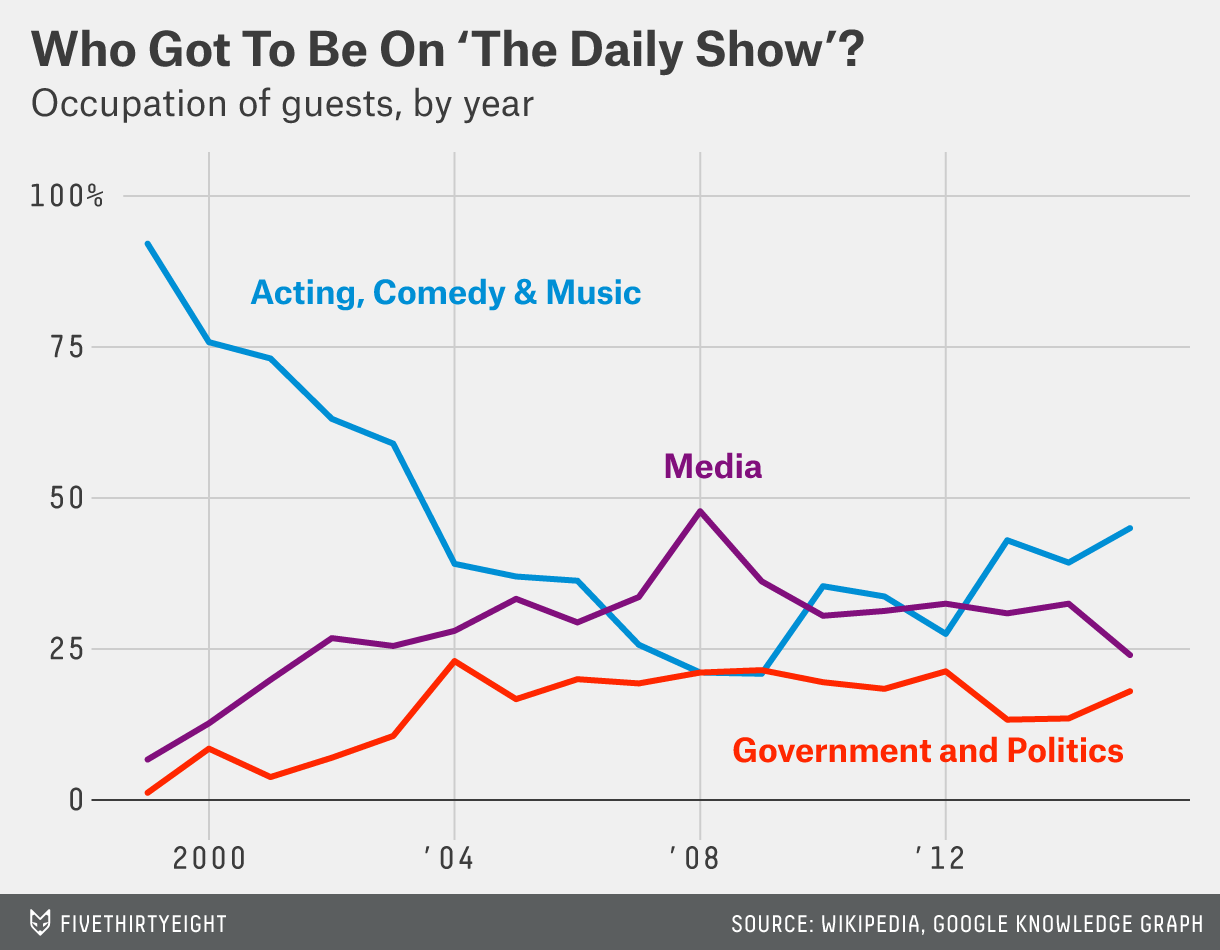

In [5]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

In [6]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
occupation = df['Occupation'].value_counts() / len(df['Occupation'])
line_data = pd.DataFrame(pd.crosstab(df['Occupation'], df['Year'], normalize='columns')).reset_index().melt(id_vars='Occupation')
print(line_data.head())
data_pivot = line_data.pivot_table(index='Year', columns='Occupation', values='value').reset_index()
data_pivot = data_pivot[['Year', 'Acting, Comedy & Music', 'Government and Politics', 'Media']]
data_pivot

                Occupation  Year     value
0   Acting, Comedy & Music  1999  0.903614
1  Government and Politics  1999  0.012048
2                    Media  1999  0.066265
3                    Other  1999  0.018072
4   Acting, Comedy & Music  2000  0.739645


Occupation,Year,"Acting, Comedy & Music",Government and Politics,Media
0,1999,0.903614,0.012048,0.066265
1,2000,0.739645,0.082840,0.124260
2,2001,0.726115,0.038217,0.197452
3,2002,0.622642,0.069182,0.264151
4,2003,0.560241,0.102410,0.246988
5,2004,0.384146,0.225610,0.274390
6,2005,0.370370,0.160494,0.333333
7,2006,0.360248,0.192547,0.291925
8,2007,0.255319,0.170213,0.333333
9,2008,0.207317,0.201220,0.469512


In [0]:
# sns.lineplot(data_pivot['Year'], data_pivot['Acting, Comedy & Music'])
# sns.lineplot(data_pivot['Year'], data_pivot['Government and Politics'])
# sns.lineplot(data_pivot['Year'], data_pivot['Media'])

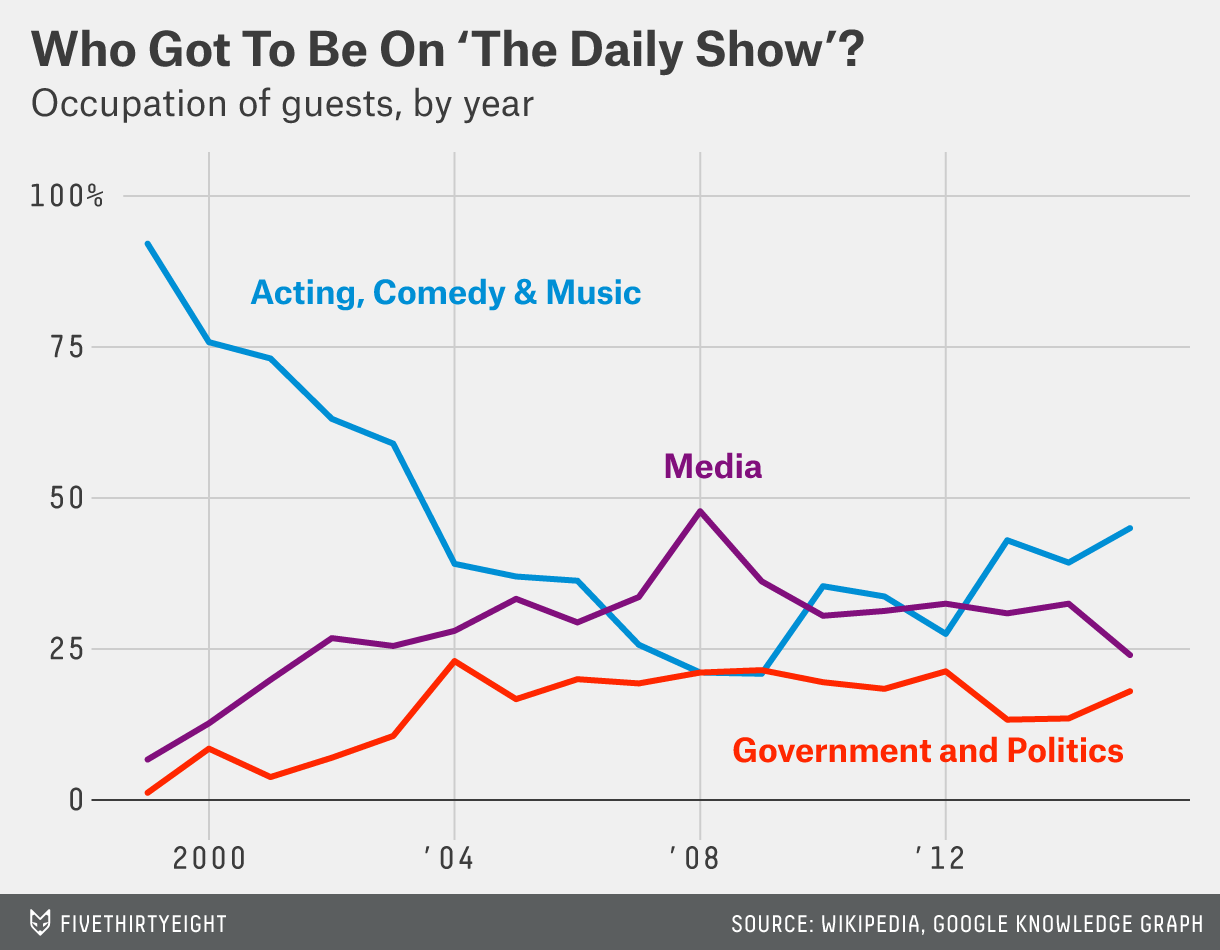

In [9]:
display(example)

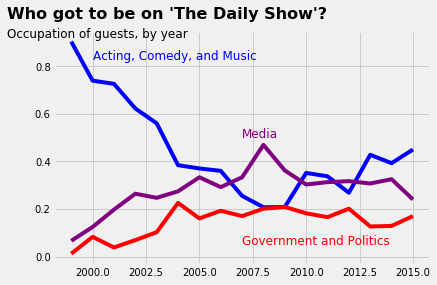

In [41]:
import matplotlib.ticker as mtick

plt.style.use('fivethirtyeight')

plt.figure()

x = data_pivot['Year']
y = data_pivot['Acting, Comedy & Music']
x2 = data_pivot['Year']
y2 = data_pivot['Government and Politics']
x3 = data_pivot['Year']
y3 = data_pivot['Media']

ax = plt.plot(x, y, color='blue')
plt.plot(x2, y2, color='red')
plt.plot(x3, y3, color='purple')


plt.text(x=1996, y=1, fontsize=16, fontweight='bold',
        s = "Who got to be on 'The Daily Show'?")
plt.text(x=1996, y=.92, fontsize=12,
        s = "Occupation of guests, by year")
plt.text(x=2000, y=.83, fontsize=12,
        s = "Acting, Comedy, and Music", color='blue')
plt.text(x=2007, y=.5, fontsize=12,
        s = "Media", color='purple')
plt.text(x=2007, y=.05, fontsize=12,
        s = "Government and Politics", color='red');

plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

# ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

In [0]:
line_data.plot(data_pivot['Year'], data_pivot['Acting, Comedy & Music']);

In [0]:
data['Occupation'][data['Year'] == 1999].value_counts() / len(data['Occupation'][data['Year'] == 1999])

Acting, Comedy & Music      0.9036144578313253
Media                      0.06626506024096386
Other                     0.018072289156626505
Government and Politics   0.012048192771084338
Name: Occupation, dtype: float64